DESCRIPTION: Create a set of points and find the best line that fits those points.

# Linear Regression using Machine Learning
The "Linear Regression" notebook makes one pass through the data (i.e. one epoch) to calculate the best "a" and "b" values . It can do this because it's a well understood, simple linear model and we know how to do it with one pass. Most $15 calculators can do this.

In this case, for illustration, we will use standard machine learning techniques to iterate to the actual "best fit"i; i.e. minimize the cost function.

The goal here is to take a set of (x,y) points and find a line that best fits the points.
"Best" is defined to be the line that minimizes the error function defined to be the sum of the squares of the differences between the points and the line.

In [25]:
%config IPCompleter.greedy=True
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

Simulate a semi-random set of 100 (x,y) points that have something in common.
In this case, our function will be:

$$ f(x) = x^{2} + r(x) $$


where r(x) is a random number from -1000 to 1000. So the points will scatter around f(x) = x^2

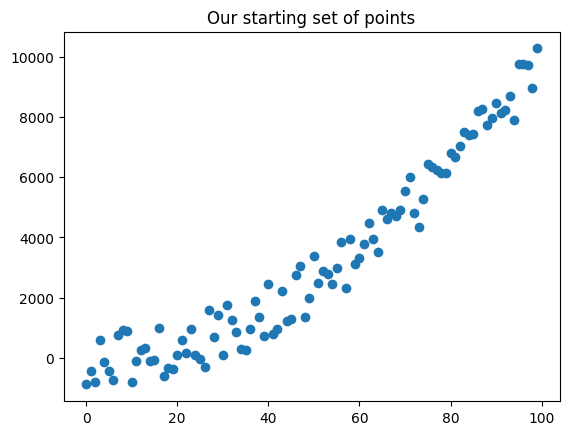

In [26]:
random.seed(123)

xs = list(range(100))
ys = [x**2 + random.randint(-1000, 1000) for x in xs]

# Plot it
plt.title('Our starting set of points')
plt.scatter(xs, ys);

In [34]:
# Create a cost function that calculates the error of a line in the form y = a*x + b
def err(a, b, x, y):
    return (y - (a * x + b))**2

def sumsq(a, b, xs, ys):
    return sum([err(a,b,x,y) for x,y in zip(xs,ys)])

In [47]:
# How do we find the "best" line? Guess forever? No!

# We create a function that only accepts a two dimensional list, called x, where x[0] = a and x[1] = b.
def err1(x):
    return sumsq(x[0], x[1], xs, ys)

# Then we define an initial guess
a,b = initialGuess = [200, -1800]

h = learning_rate = 0.0001
epochs = 10000

for i in range(epochs):
    f = err1([a,b])
    dfa = err1([a+h, b])
    dfb = err1([a, b+h])
    grada = (f - dfa)
    gradb = (f - dfb)
    #print(f"{i:4} {a:10.4f} {grada:15.4f} {b:15.4f} {gradb:15.4f}, {f:15.4f}")
    a = a + grada * h
    b = b + gradb * h
    
# This creates a result object that contains optimized values.
print(a,b)



print(f"""
The important values are:
  a = {a}
  b = {b}
  sumsq = {f:,}
""")


102.89475613338577 -1801.8988449092615

The important values are:
  a = 102.89475613338577
  b = -1801.8988449092615
  sumsq = 88,631,211.64276911



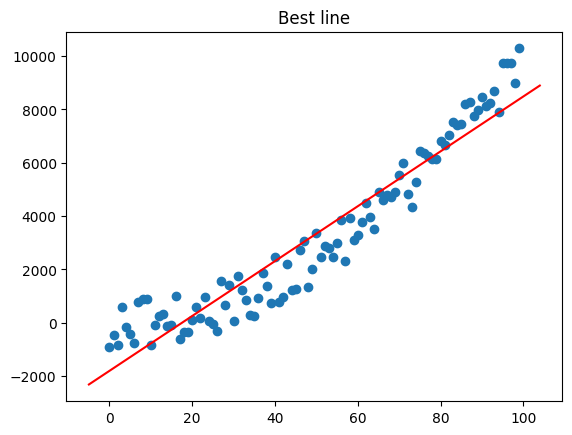

In [43]:
# Now let's plot the "best" line: y = ax+b
plt.title('Best line')
plt.scatter(xs, ys)

# Plot a red line: y=ax+b
axes = plt.gca()
xx = np.array(axes.get_xlim())
yy = a * xx + b
plt.plot(xx, yy, '-', color='r');

And that is the only line that best "fits" the set of points.